In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import MultiheadAttention as MultiheadAttention
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import json
# # Define the dataset
# with open('/content/new_merged.json', 'r') as file:
#     intents = json.load(file)
intents ={
    "smalltalk_greetings": {
        "utterances": [
            "hi",
            "hello",
            "hey"
        ],
        "responses": [
            "Hello!",
            "Hi there!",
            "Greetings!",
            "Hi!"
        ]
    },
    "smalltalk_agent_acquaintance": {
        "utterances": [
            "what's your name?",
            "what can I call you?",
        ],
        "responses": [
            "You can call me Chatbot.",
            "My name is Chatbot.",
            "I'm Chatbot!"
        ]
    },
    "smalltalk_agent_be_clever": {
        "utterances": [
            "can you get smarter",
            "study"
        ],
        "responses": [
            "I'm certainly trying.",
            "I'm definitely working on it."
        ]
    }
}



class DIT(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(DIT, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        # self.attn = MultiheadAttention(hidden_size, num_heads)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

input_size = 300 # 
hidden_size = 128 
output_size = len(intents) 
learning_rate = 0.001
num_epochs = 100

# Create the DIT model
dit_model = DIT(input_size, hidden_size, output_size)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(dit_model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    for intent in intents:
        for utterance in intents[intent]["utterances"]:
            # One-hot encode the utterance
            input_vec = torch.zeros(input_size)
            for i, char in enumerate(utterance):
                input_vec[i] = ord(char)
            
            # Get the target label for the intent
            target = torch.tensor([list(intents.keys()).index(intent)])
            
            # Forward pass
            output = dit_model(input_vec.unsqueeze(0)) # Add a batch dimension to the input
            loss = criterion(output, target)
            
            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

# Test the model
y_true = []
y_pred = []

for intent in intents:
    for utterance in intents[intent]["utterances"]:
        input_vec = torch.zeros(input_size)
        for i, char in enumerate(utterance):
            input_vec[i] = ord(char)
        output = dit_model(input_vec)
        pred_intent = list(intents.keys())[torch.argmax(output).item()]
        
        # Append the true and predicted labels to the lists
        y_true.append(intent)
        y_pred.append(pred_intent)

# Calculate accuracy and other evaluation metrics
print(y_true)
print(y_pred)

['smalltalk_greetings', 'smalltalk_greetings', 'smalltalk_greetings', 'smalltalk_agent_acquaintance', 'smalltalk_agent_acquaintance', 'smalltalk_agent_be_clever', 'smalltalk_agent_be_clever']
['smalltalk_greetings', 'smalltalk_greetings', 'smalltalk_greetings', 'smalltalk_agent_acquaintance', 'smalltalk_agent_acquaintance', 'smalltalk_agent_be_clever', 'smalltalk_agent_be_clever']


Text(35.24999999999998, 0.5, 'True')

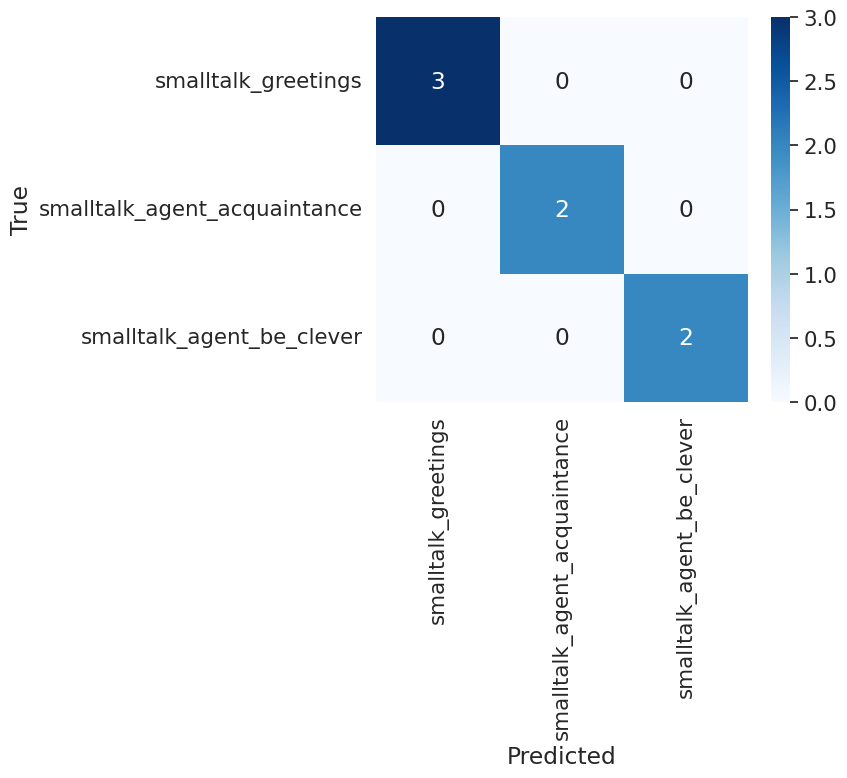

In [4]:
cm = confusion_matrix(y_true, y_pred, labels=list(intents.keys()))
sns.set(font_scale=1.4)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=list(intents.keys()), yticklabels=list(intents.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")

In [5]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_true, y_pred, labels=list(intents.keys()))
class_report = classification_report(y_true, y_pred, labels=list(intents.keys()))

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)



Confusion Matrix:
[[3 0 0]
 [0 2 0]
 [0 0 2]]

Classification Report:
                              precision    recall  f1-score   support

         smalltalk_greetings       1.00      1.00      1.00         3
smalltalk_agent_acquaintance       1.00      1.00      1.00         2
   smalltalk_agent_be_clever       1.00      1.00      1.00         2

                    accuracy                           1.00         7
                   macro avg       1.00      1.00      1.00         7
                weighted avg       1.00      1.00      1.00         7

